# Economic status and Crimes in Community Areas of Chicago

### Yitian He  11/18/2019

### Package

The packages that are used in for this project are: Pandas, Numpy, Matplotlib.pyplot, Sklearn and Seaborn.

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns;
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Data

The main dataset being used for this project is the "community-area-income-level.csv" downloaded from Chicago Data Portal and the extra dataset is "Chicago_Crimes_2012_to_2017.csv" which is also downloaded from Chicago Data Portal. The datasets will be explained in details in later sections.

In [297]:
# Load the crime data
crime = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", 
                    usecols = ["Primary Type","Description", "Location Description", "Arrest", "Community Area",
                             "Longitude", "Latitude", "Year"], na_values='')
crime.dropna(axis=0, how='any')
# use only 2016 data
crime = crime[crime["Year"]==2016]
#crime.head()

In [298]:
# Load Income level data
income = pd.read_csv("community-area-income-level.csv")
income = income.head(77)
#income.head()

### Abstract

The goal of this project is to explore the economic status and crimes and their relationship in each community areas in Chicago. There are three questions developed from the data analysis of the dataset: 1. is it appropriate to use multiple linear regression to explain how do percent of housing crowded, percent of housing crowded, percent 16+ unemployed and percent aged 25+ without high school diploma impact the hardship index of a community area? If not, use PCA to reduce dimensions then cluster the coordinates and interpret the clusters; 2. does high percentage of 16+ unemployed in a community area lead to a high number of crimes? 3. Are community close to each other have a more similar economic condition (use one of the unsupervised learning methods)? For the first question, the multiple linear regression is not appropriate to use to explain how percent of housing crowded, percent of housing crowded, percent 16+ unemployed and percent aged 25+ without high school diploma impact the hardship index of a community area because of their inner-correlation. For the second question, the results are showing that there is not a strict association between the two variables. Although some community areas with high number of crimes have a high percentage of 16+ unemployed, some have a very low percentage. And for the third question, geographically, community with similar economic conditions are mostly connected but the pattern is not clear and differenct clusters of economic status are overlapped. The following contains include the tables and figures that are used to explain the results.

### Introduction and Background

Chicago is one of the biggest cities in the United States. The wealth divide and crime rate in this city are controvertial topics for years. Inside the city of Chicago, there are 77 community areas. This project uses the dataset of the crimes in these community arears in the year of 2016 and the economic information in these community areas to generate some conclusions on the relationship between these information. This project also answers three questions generated from the data analysis. The first question is: Is it appropriate to use multiple linear regression to explain how do percent of housing crowded, percent of household below poverty, percent 16+ unemployed and percent aged 25+ without high school diploma impact the hardship index of a community area? If not, use PCA to reduce the dimensions. After conducting PCA, a new dataset will be generated and clustering will be performed on this new dataset. In this question, each of the four independent variable is a persentage that provides information about the economy condition in a community area and the dependent variable, hardship index, is a score ranges from 1-100 that represents the level of hardship. This question is to explore whether a multiple linear regression model is appropriate. If not, PCA is required to reduce the dimensions and generate a linear regression with principal components as the independent variables. Then I assign the coordinators into different clusters and interpret the clusters. The second question is: Does high percentage of 16+ unemployed lead to a high number of crimes in each community area in Chicago? This question is to explore if there is a positive relationship between the percentage of people aged above 16 without a job and the number of crimes in a community area. The reason to choose these variables is that people who are over 16 years old without a job have more probability to commit crimes than people who have a job or people who are younger than 16 in common sense. The third question is: Are community close to each other have a more similar economic condition? To be specific, this question is to explore whether people have similar economic condition will live near to each other so that the economic condition of the connected community area will have similar economic condition. In the following sections, the three questions will be reprented by "question 1", "question 2" and "question 3".

### Methods

For question 1, the dataset "community-area-income-level.csv" is used. This dataset, downloaded from Chicago Data Portal is clean and contains 11 variables. Firstly, I used the python library "matplotlib.pyplot" to make scatter plot to look at the association between four independent variables and dependent variable, hardship index. Then I used package "seaborn" to make a correlation matrix to see whether the independent variables are correlated to each other. If the correlation matrix shows that there is a high correlation between some of the variables, the multiple linear regression would not be appropriate. Then I used "sklearn" package to conduct principal component analysis after scaling on the dataset and see how much percent of variance the principal components can explain. After that, I will use "sklearn" package again to use Kmeans clustering method to assign the coordinators into different clusters and then try to interpret the clusters.


For question 2, the dataset "Chicago_Crimes_2012_to_2017.csv" is used. This dataset, also downloaded from Chicago Data Portal, contains the information of each crimes recorded in Chicago during the year 2012 to 2017.  For this specific question, I merged the two data set based on the same variable "community area number" to give each crime a location based on the community area. To answer this question, I use the package of "pingouin" to calculate the correlation coefficient of the two variables and then I made two plots showing the location of each crime on the map of Chicago using the "matplotli" package. The first plot will only use a randomly selected subset of the original dataset so that the distribution of the points in the plot could be more obvious. The points on the second plot is colored based on the percentage of unemployed people who are over 16 years old in each community area. The answer to question 2 can be shown by comparing two plots.


For question 3, the dataset "community-area-income-level.csv" is used again. To see whether community close to each other have a similar economic condition, I used made a plot containing a point in each community area on the map of Chicago. Then I used Kmeans clustering method from the "sklearn" package with the vairables "hardship index", "percent housing crowded", "percent households below poverty", "percent aged 16+ unemployed" and "percent aged 25+ without high school diploma" and color the points based on the clusters to see whether the points of same color are close to each other.

### Results

#### Question 1
The scatterplot of independent variables, "percent of housing crowded", "percent households below poverty", "percent aged 16+ unemployed" and "percent aged 25+ without high school diploma", versus dependent variable, "hardship index" and four scatterplots of each independent variables vursus "hardship index" are shown below. From the plots, we can tell that all the variables are positively related to the hardship index. Also, from common sense, we can infer that a high percentage of housing crowded, households below poverty, aged over 16 without a job, aged over 25 without high school diploma would cause a higher level of hardship that the people who live in that community area feel.

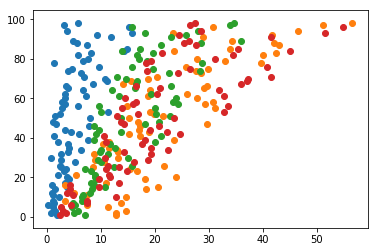

In [320]:
plt.scatter('PERCENT OF HOUSING CROWDED', 'HARDSHIP INDEX', data = income)
plt.scatter("PERCENT HOUSEHOLDS BELOW POVERTY", y = "HARDSHIP INDEX", data = income)
plt.scatter(x='PERCENT AGED 16+ UNEMPLOYED', y='HARDSHIP INDEX', data = income)
plt.scatter(x='PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', y='HARDSHIP INDEX', data = income)
plt.show()



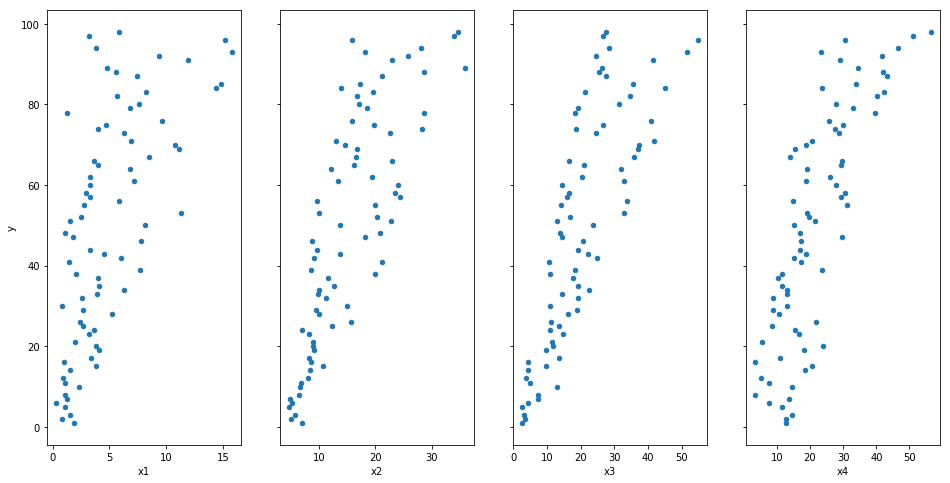

In [163]:
y = income["HARDSHIP INDEX"]
x1 = income["PERCENT OF HOUSING CROWDED"]
x2 = income["PERCENT AGED 16+ UNEMPLOYED"]
x3 = income["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"]
x4 = income["PERCENT HOUSEHOLDS BELOW POVERTY"]
dataframe = pd.DataFrame({"x1":x1, "x2":x2, "x3":x3, "x4":x4, "y":y})
dataframe
fig, axs = plt.subplots(1, 4, sharey=True)
dataframe.plot(kind='scatter', x='x1', y='y', ax=axs[0], figsize=(16, 8))
dataframe.plot(kind='scatter', x='x2', y='y', ax=axs[1])
dataframe.plot(kind='scatter', x='x3', y='y', ax=axs[2])
dataframe.plot(kind='scatter', x='x4', y='y', ax=axs[3])




Then, I made a visualization of the correlation matrix to see how each variables relate to each other. From the matrix shown below, we can tell that the correlation between "percent of housing crowded and "percent of aged 25+ without diploma" is 0.88 and the correlation between "percent house holds below poverty" and "percent aged 16+ unemployed" is 0.80. These two correlation are very high so that there exists high correlation between the independent variables. Thus, a multiple linear regression model is not appropriate to be used to explain the relationship.

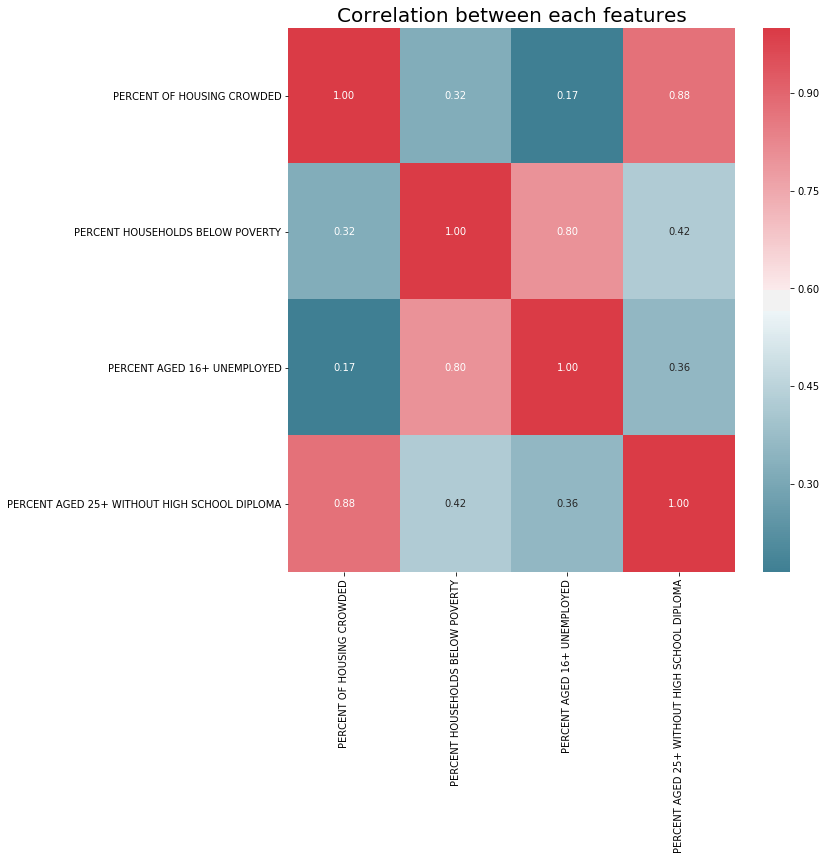

In [318]:
corr = income_feature.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.title("Correlation between each features", fontsize = 20)
plt.show()

As a result, principal components analysis was conducted to reduce the dimensions as well as eliminate the correlation between independent variables since the principal components are independent to each other. The table below shows the coordinators of PC1 and PC2. I also paste the hardship index column to the dataframe to make the dataframe more informative. From the result, the first principal component explained 62% of the variance and the second principal component explained 31% of the variance. In other words, the first two components have already explained more than 90% of the variance in the original dataset so that two principal components are already enough.

In [316]:
income_pca = income[["PERCENT OF HOUSING CROWDED", "PERCENT HOUSEHOLDS BELOW POVERTY", "PERCENT AGED 16+ UNEMPLOYED", "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA", "HARDSHIP INDEX"]]
income_feature = income[["PERCENT OF HOUSING CROWDED", "PERCENT HOUSEHOLDS BELOW POVERTY", "PERCENT AGED 16+ UNEMPLOYED", "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"]]


In [324]:
scaler = StandardScaler()
scaler.fit(income_feature)
income_scaled = scaler.transform(income_feature)

In [325]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(income_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, income_pca[['HARDSHIP INDEX']]], axis = 1)
finalDf.head()

,PC1,PC2,HARDSHIP INDEX
0,-0.060787,-0.774752,39.0
1,-0.205791,-1.127189,46.0
2,-0.842003,0.069866,20.0
3,-1.446414,-0.497838,17.0
4,-2.603103,-0.078187,6.0


In [326]:
pca.explained_variance_ratio_

array([0.61939418, 0.30547598])

Using the Kmeans clustering method on the PCA results and coloring them generate the following scatterplot. The three clusters look appropriate;. Although it is hard for me to go back to the dataset and label these groups since other information is required, I know how many clusters there are in the data I can label the population with from this result.

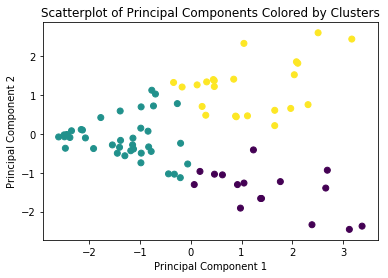

In [336]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(principalDf)
y_kmeans=kmeans.predict(principalDf)
principalDf["cluster"] = y_kmeans
plt.scatter(x = "PC1", y = "PC2", c = y_kmeans, data = principalDf)
plt.title("Scatterplot of Principal Components Colored by Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### Question 2:


Firstly, the correlation coefficient of the two is 0.176, which is relatively low.

In [364]:
import pingouin as pg
pg.corr(x=crime_merge['PERCENT AGED 16+ UNEMPLOYED'], y=crime_merge['count'])


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,77,0.176,"[-0.05, 0.38]",0.031,0.005,0.125839,0.449,0.337


Next, the scatterplot below shows 10% of the crime in Chicago during the year 2016 on the map of Chicago. We can tell that the points are mostly in the middle area and the middle and east of the bottom area. There is also lots of crimes in the upper east area.

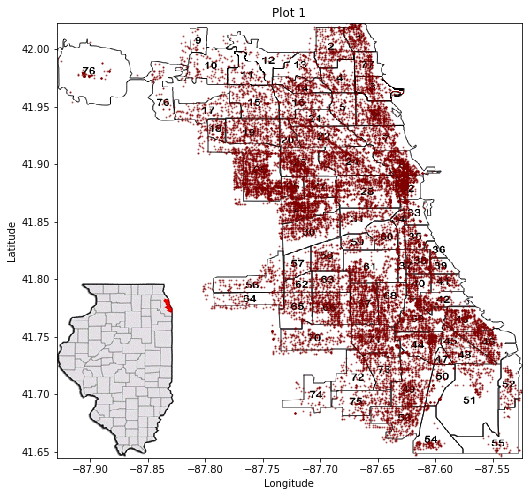

In [354]:
crime_sample = crime.sample(frac = 0.1)
chicago_map = mpimg.imread("map.png")
figure(num = None, figsize = (12, 8))
ax = plt.scatter(x = "Longitude", y = "Latitude", alpha = 0.5, s = 1, label = None, data = crime_sample, c = "maroon")
plt.axis(aspect = "equal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(crime.Longitude.min(), crime.Longitude.max())
plt.ylim(crime.Latitude.min(), crime.Latitude.max())
plt.title("Plot 1")
plt.imshow(chicago_map, extent = [crime.Longitude.min(),crime.Longitude.max(), crime.Latitude.min(), crime.Latitude.max()])

In [203]:
mix_community = pd.merge(left=crime, right=income, left_on='Community Area', right_on='Community Area Number', how='left')


Then I used all the crimes and generate a new scatterplot of crimes on the map of Chicago and color all the points based on the percentage of 16+ years old people without a job in each community. As a result, the community area with points that has darker color means that the percentage of unemployed people over 16.

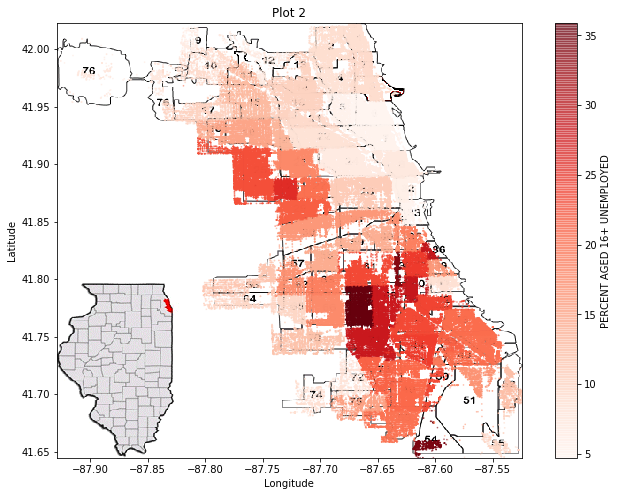

In [355]:
chicago_map = mpimg.imread("map.png")
figure(num = None, figsize = (12, 8))
ax = plt.scatter(x = "Longitude_x", y = "Latitude_x", alpha = 0.5, s = 0.5,  label = None, data = mix_community, c = "PERCENT AGED 16+ UNEMPLOYED", cmap = "Reds")
plt.axis(aspect = "equal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label = "PERCENT AGED 16+ UNEMPLOYED")
plt.title("Plot 2")
plt.xlim(crime.Longitude.min(), crime.Longitude.max())
plt.ylim(crime.Latitude.min(), crime.Latitude.max())
plt.imshow(chicago_map, extent = [crime.Longitude.min(),crime.Longitude.max(), crime.Latitude.min(), crime.Latitude.max()])

To compare these two plots, I focus on whether the areas with more points (from plot 1) have darker color (from plot 2). Specifically, to answer question 2, I wanted to see whether the community area with more crimes have a larger percentage of unemployed people over 16. From the two plots, the west side of middle area and the south side of Chicago have lots of crimes and high percentage of unemployed people over 16. However, the upper east side of Chicago have lots of crime even though the percentage of unemployed people over 16 in these community areas are quite low.

To take a more detailed look on the relationship of the two variables, I make a barplot of the Percenate of unemployed people over 16 of 10 communities with the highest crime number in 2016 and also a barplot of percenate of unemployed people over 16 of 10 communities with the lowest crime number in 2016 and compare. 

In [315]:
# Barplot
crime_area = mix_community[["COMMUNITY AREA NAME", "Community Area"]].groupby("Community Area").size().reset_index(name = "count")
crime_merge=pd.merge(left = income, right = crime_area, left_on = "Community Area Number", right_on = "Community Area")


In [337]:
# community areas with top 20 number of crimes 
sorted_merge = crime_merge.sort_values("count", ascending = False).head(n=10)

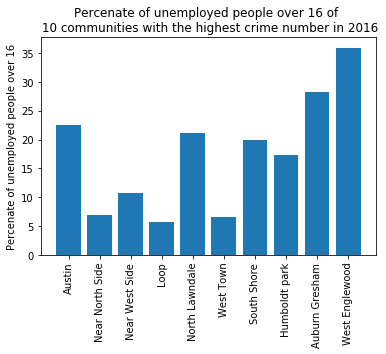

In [351]:
a = sorted_merge[["COMMUNITY AREA NAME", "PERCENT AGED 16+ UNEMPLOYED", "count"]]
a.groupby("COMMUNITY AREA NAME")
plt.bar("COMMUNITY AREA NAME", "PERCENT AGED 16+ UNEMPLOYED", data = a)
plt.xticks(rotation = "vertical")
plt.ylabel("Percenate of unemployed people over 16")
plt.title("Percenate of unemployed people over 16 of \n 10 communities with the highest crime number in 2016")
plt.show()


In [352]:
sorted_merge2 = crime_merge.sort_values("count", ascending = True).head(n=10)

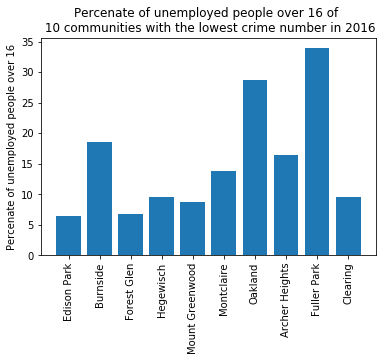

In [353]:
a = sorted_merge2[["COMMUNITY AREA NAME", "PERCENT AGED 16+ UNEMPLOYED", "count"]]
a.groupby("COMMUNITY AREA NAME")
plt.bar("COMMUNITY AREA NAME", "PERCENT AGED 16+ UNEMPLOYED", data = a)
plt.xticks(rotation = "vertical")
plt.ylabel("Percenate of unemployed people over 16")
plt.title("Percenate of unemployed people over 16 of \n 10 communities with the lowest crime number in 2016")
plt.show()

From the two barplots, I found that there are community areas with percentage of 16+ unemployed around 5 or larger than 30 in both the group contains community areas with the highest number of crime and the group contains community areas with lowest number of crime. And the percentage does not show any pattern as the number of crime increases or decreases.

In conclusion, for question 2, although come communities with a high percentage of 16+ unemployed do have a high number of crimes during the year 2016, there is not a high correlated relationship between the two since there are some community areas showing the opposite results and the correlation coefficient is small. The two variables seem to have some relationship but it cannot be proved from this specific dataset. 

#### Question 3

Firstly I made a scatterplot that each points represent a community area based on their location on the map of Chicago (showing below).

In [ ]:
# use k-means cluster on income per capita and hardship index
# then use cluster as color to display on the map

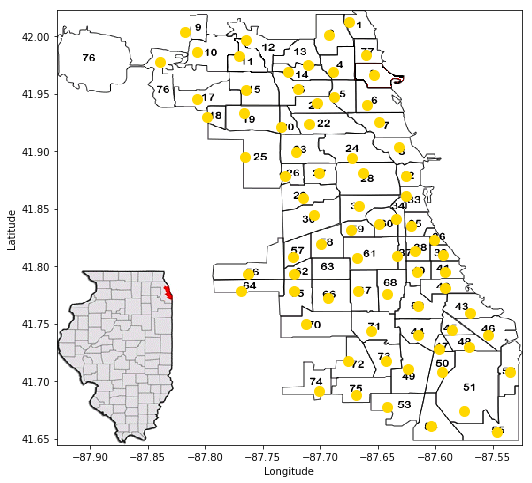

In [209]:
chicago_map = mpimg.imread("map.png")
figure(num = None, figsize = (12, 8))
ax = plt.scatter(x = "Longitude", y = "Latitude", alpha = 1, s = 100, c = "gold",  label = None, data = income)
plt.axis(aspect = "equal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.colorbar()
plt.xlim(crime.Longitude.min(), crime.Longitude.max())
plt.ylim(crime.Latitude.min(), crime.Latitude.max())
plt.imshow(chicago_map, extent = [crime.Longitude.min(),crime.Longitude.max(), crime.Latitude.min(), crime.Latitude.max()])

Then I use Kmeans clustering method to assign each point to a cluster and color them on the scatterplot based on which clusters they belong to.

In [381]:

kmeans=KMeans(n_clusters=3)
income_kmeans = income[["HARDSHIP INDEX", "PERCENT HOUSEHOLDS BELOW POVERTY","PERCENT OF HOUSING CROWDED", "PERCENT AGED 16+ UNEMPLOYED", "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"]]
kmeans.fit(income_kmeans)
y_kmeans=kmeans.predict(income_kmeans)
income_kmeans["cluster"] = y_kmeans
income_merge = pd.merge(left = income, right = income_kmeans)




/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


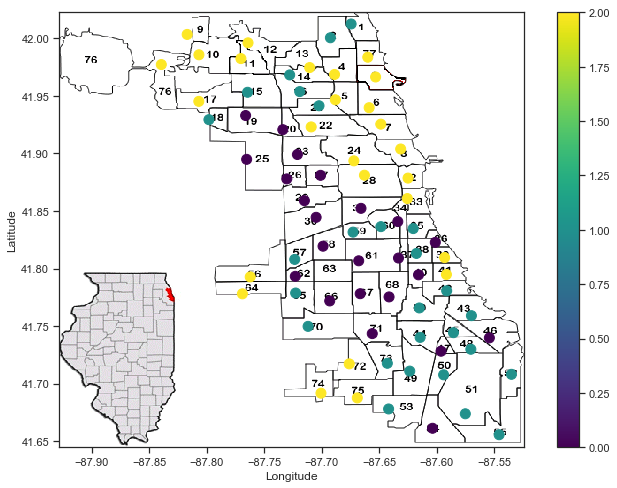

In [382]:
chicago_map = mpimg.imread("map.png")
figure(num = None, figsize = (12, 8))
ax = plt.scatter(x = "Longitude", y = "Latitude", alpha = 1, s = 100, c = "cluster",  label = None, data = income_merge, cmap = "viridis")
plt.axis(aspect = "equal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.xlim(crime.Longitude.min(), crime.Longitude.max())
plt.ylim(crime.Latitude.min(), crime.Latitude.max())
plt.imshow(chicago_map, extent = [crime.Longitude.min(),crime.Longitude.max(), crime.Latitude.min(), crime.Latitude.max()])
plt.show()

From the plot, we can tell that the points with the same color are mostly connected to each other. Although there is not a clear pattern that points of different color are located in specific areas of the map, we can still tell that points with same colors are connected. For example in the upper left corner of the plot, there are 6 yellow points connected to each other and there are no other color points between them. Thus, community areas with similar economic status are close to each other and mostly connected to each other.

### Conclusion

In conclusion, after analyzing the two datasets that contain the crime and economic information, I found out that, opposite to my hypothesis, there is no obvious correlation between the percentage of people over 16 years old without a job and the number of crimes in a year. Also, I found out that it is not appropriate to use multiple linear regression model to explain the relationship between the percentages of housing crowded, household below poverty, 16+ unemployed and aged 25+ without high school diploma and hardship index. In common sense, these variables do have strong correlation, but more researches are needed to find out a best model to predict the hardship index of a community area based on those percentages. Moreover, by conducting unsupervised learning method on the datasets, I found out that the community areas that have similar economic status are mostly connected to each other. From this result, I can infer that people who have similar economic status in Chicago tend to live in the similar areas.